
# Graphs advanced

## Contents 
0. Install packages
1. Seaborn
2. Plotly - interactive graphs 
3. Plotnine 
4. IPywidgets - interactive graphs

## 0. Install packages

In [7]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install plotnine

     |████████████████████████████████| 1.2 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.2 MB/s  eta 0:00:01
     |████████████████████████████████| 111 kB 7.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## 1. Seaborn

In [1]:
#Intro to Python p.415

c = lambda f:5/9 * (f-32)
temps = [(f, c(f)) for f in range(0,101,10)]

import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

#axes = temps_df.plot(x='Fahrenheit', y = 'Celsius', style = ".-")
#y_label = axes.set_ylabel('Celsius')

nyc = pd.read_csv('USH00305801-tavg-1-1-1895-2020.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head()

import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature) 

FileNotFoundError: [Errno 2] No such file or directory: 'USH00305801-tavg-1-1-1895-2020.csv'

## 2. Plotly

Plotly is a library for making interactive graphs. It can be used to make more advanced graphs. 

Plotly has two modes: an offline mode and an online mode. With the offline mode you can make nice graphs but can't make interactive graphs. With the more advance online mode, users can make interactive graphs eg. setting the scale. 

For simple usage, there is an offline mode which you can use in Jupyter notebook. We will do this in this notebook.

If you want to present your data in a website using interactive charts and maps, Plotly is your tool. 
Plotly is a service and needs an account. You are sending a request to the plotly server and you get a html=page back. 
 
Plotly documentation can be found here:


In [1]:
%pip install plotly

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
Processing c:\users\31653\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56\retrying-1.3.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


### 2a. My first Plotly (offline mode)

In [2]:
# source https://www.youtube.com/watch?v=XUNaGFa9xCM

import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np
from scipy import special 

py.offline.init_notebook_mode(connected=True)

In [3]:
x= np.linspace(0,np.pi, 1000)

layout=go.Layout(
    title='SIMPLE EXAMPLE',
    yaxis=dict(
        title='volts'),
    xaxis=dict(
        title='nanosecs'
    )
)

trace1= go.Scatter(
    x=x,
    y=np.sin(x),
    mode='lines',
    name='sin(x)',
    line =dict(
        shape='spline'
    )
)

fig=go.Figure(data=[trace1], layout=layout)

py.offline.iplot(fig)

## 3. Plotnine with pandas

source: https://smithsonianworkshops.github.io/2018-06-12-nmnh/17-visualization-ggplot-python/index.html
Python has powerful built-in plotting capabilities such as matplotlib, but for this episode, we will be using the plotnine package, which facilitates the creation of highly-informative plots of structured data based on the R implementation of ggplot2 and The Grammar of Graphics by Leland Wilkinson. The plotnine package is built on top of Matplotlib and interacts well with Pandas.

Just as with the other packages, plotnine need to be imported. It is good practice to not just load an entire package such as from plotnine import *, but to use an abbreviation as we used pd for Pandas:



In [9]:
import plotnine as p9

In [4]:
import pandas as pd
gh_url = 'https://raw.githubusercontent.com/datacarpentry/R-genomics/gh-pages/data/Ecoli_metadata.csv'
ecoli = pd.read_csv(gh_url)
ecoli.head()

,sample,generation,clade,strain,cit,run,genome_size
0,REL606,0,NaN,REL606,unknown,NaN,4.62
1,REL1166A,2000,unknown,REL606,unknown,SRR098028,4.63
2,ZDB409,5000,unknown,REL606,unknown,SRR098281,4.60
3,ZDB429,10000,UC,REL606,unknown,SRR098282,4.59
4,ZDB446,15000,UC,REL606,unknown,SRR098283,4.66


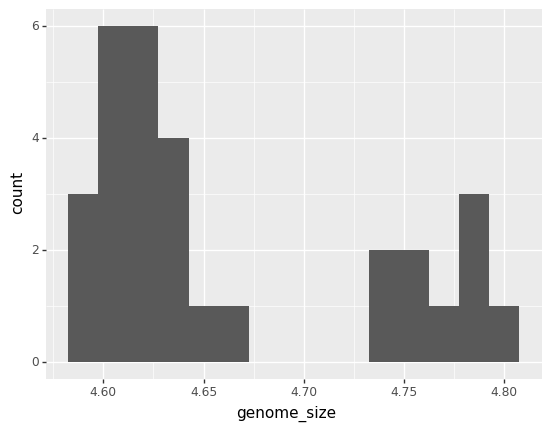

<ggplot: (8781899253685)>

In [10]:
(p9.ggplot(data=ecoli,
           mapping=p9.aes(x='genome_size'))
    + p9.geom_histogram(bins=15)
)

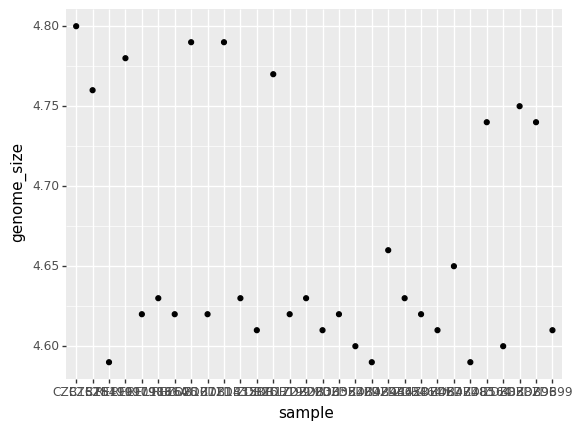

<ggplot: (8781899493617)>

In [11]:
(p9.ggplot(data=ecoli,
           mapping=p9.aes(x = 'sample', y= 'genome_size'))
 + p9.geom_point()
)

## 4. IPywidgets

- Readthedocs: https://ipywidgets.readthedocs.io/en/stable/user_install.html
- Pypi:

In [1]:
!pip install ipywidgets

In [12]:
import ipywidgets as widgets

In [14]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [15]:
#dropdown: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Dropdown
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [16]:
#radio buttons
widgets.RadioButtons(
    options=['pepperoni', 'pineapple', 'anchovies'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Pizza topping:',
    disabled=False
)

RadioButtons(description='Pizza topping:', options=('pepperoni', 'pineapple', 'anchovies'), value='pepperoni')